In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Kaggle-Dataset\Campusx\Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df = df.iloc[:, 1:]

In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encoder = LabelEncoder()

In [12]:
df['Species'] = encoder.fit_transform(df['Species'])

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df = df[df['Species'] !=0 ][['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt

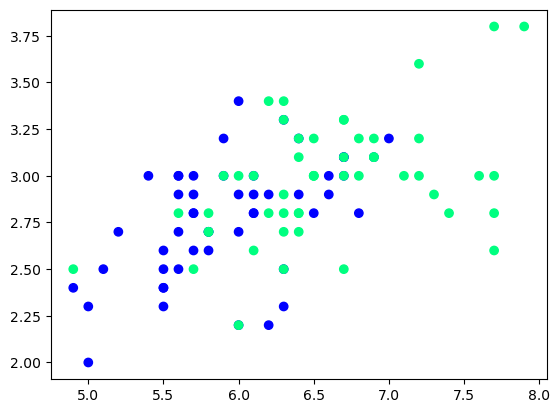

In [19]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'], cmap='winter')

In [21]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(10)
df_test = df.iloc[80:, :].sample(10)

In [22]:
df_test

,SepalLengthCm,SepalWidthCm,Species
123,6.3,2.7,2
88,5.6,3.0,1
127,6.1,3.0,2
118,7.7,2.6,2
74,6.4,2.9,1
106,4.9,2.5,2
110,6.5,3.2,2
77,6.7,3.0,1
116,6.5,3.0,2
79,5.7,2.6,1


In [23]:
df_test

,SepalLengthCm,SepalWidthCm,Species
123,6.3,2.7,2
88,5.6,3.0,1
127,6.1,3.0,2
118,7.7,2.6,2
74,6.4,2.9,1
106,4.9,2.5,2
110,6.5,3.2,2
77,6.7,3.0,1
116,6.5,3.0,2
79,5.7,2.6,1


In [24]:
df_val

,SepalLengthCm,SepalWidthCm,Species
70,5.9,3.2,1
100,6.3,3.3,2
59,5.2,2.7,1
136,6.3,3.4,2
91,6.1,3.0,1
143,6.8,3.2,2
80,5.5,2.4,1
69,5.6,2.5,1
129,7.2,3.0,2
85,6.0,3.4,1


In [25]:
X_test = df_val.iloc[:, 0:2].values
y_test = df_val.iloc[:, -1].values

In [26]:
X_test

array([[5.9, 3.2],
       [6.3, 3.3],
       [5.2, 2.7],
       [6.3, 3.4],
       [6.1, 3. ],
       [6.8, 3.2],
       [5.5, 2.4],
       [5.6, 2.5],
       [7.2, 3. ],
       [6. , 3.4]])

In [27]:
y_test

array([1, 2, 1, 2, 1, 2, 1, 1, 2, 1])

# Case 1 - Bagging

In [29]:
# Data for tree
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalLengthCm,SepalWidthCm,Species
97,6.2,2.9,1
104,6.5,3.0,2
104,6.5,3.0,2
81,5.5,2.4,1
144,6.7,3.3,2
75,6.6,3.0,1
97,6.2,2.9,1
75,6.6,3.0,1


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [32]:
dt_bag1 = DecisionTreeClassifier()


In [34]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

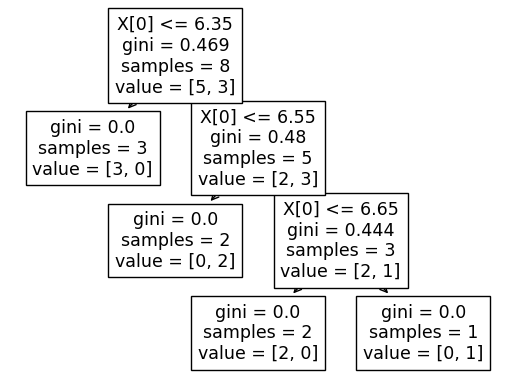

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


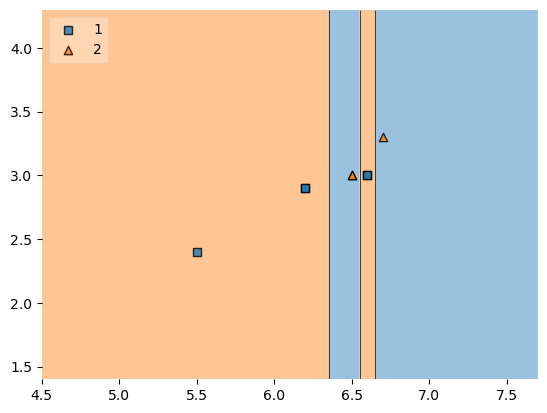

In [35]:
evaluate(dt_bag1, X, y)

In [37]:
# Data for tree1
df_bag = df_train.sample(8, replace=True)

# fetch X and y
X= df_bag.iloc[:, 0:2]
y= df_bag.iloc[:,-1] 

# print df_bag
df_bag

,SepalLengthCm,SepalWidthCm,Species
111,6.4,2.7,2
133,6.3,2.8,2
144,6.7,3.3,2
144,6.7,3.3,2
81,5.5,2.4,1
104,6.5,3.0,2
144,6.7,3.3,2
144,6.7,3.3,2


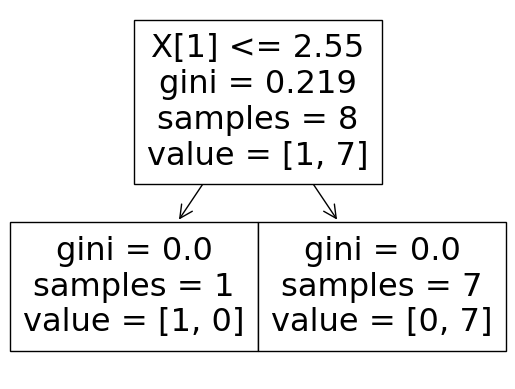

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


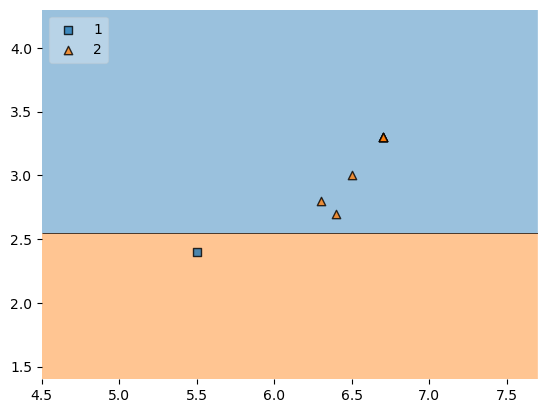

In [38]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

In [39]:
# Data for tree1
df_bag = df_train.sample(8, replace=True)

# fetch X and y
X= df_bag.iloc[:, 0:2]
y= df_bag.iloc[:,-1] 

# print df_bag
df_bag

,SepalLengthCm,SepalWidthCm,Species
51,6.4,3.2,1
133,6.3,2.8,2
97,6.2,2.9,1
75,6.6,3.0,1
65,6.7,3.1,1
81,5.5,2.4,1
115,6.4,3.2,2
81,5.5,2.4,1


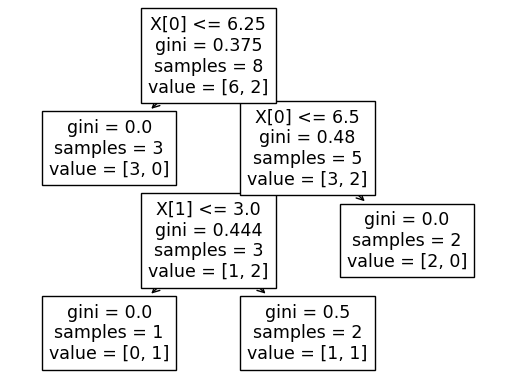

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


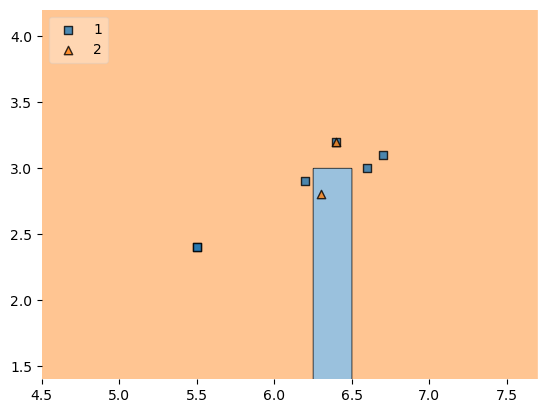

In [40]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

# Predict

In [41]:
df_test


,SepalLengthCm,SepalWidthCm,Species
123,6.3,2.7,2
88,5.6,3.0,1
127,6.1,3.0,2
118,7.7,2.6,2
74,6.4,2.9,1
106,4.9,2.5,2
110,6.5,3.2,2
77,6.7,3.0,1
116,6.5,3.0,2
79,5.7,2.6,1


In [49]:
print('Predictor 1', dt_bag1.predict(np.array([2.2,5.6]).reshape(1,2)))
print('Predictor 2', dt_bag2.predict(np.array([2.2,5.6]).reshape(1,2)))
print('Predictor 3', dt_bag3.predict(np.array([2.2,5.6]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [50]:
#  row sampling without replacement
df_train


,SepalLengthCm,SepalWidthCm,Species
144,6.7,3.3,2
115,6.4,3.2,2
111,6.4,2.7,2
75,6.6,3.0,1
65,6.7,3.1,1
51,6.4,3.2,1
104,6.5,3.0,2
97,6.2,2.9,1
133,6.3,2.8,2
81,5.5,2.4,1


In [51]:
df_train.sample(8)

,SepalLengthCm,SepalWidthCm,Species
65,6.7,3.1,1
75,6.6,3.0,1
133,6.3,2.8,2
115,6.4,3.2,2
144,6.7,3.3,2
81,5.5,2.4,1
104,6.5,3.0,2
111,6.4,2.7,2


# Random Subspaces

In [54]:
df1 = pd.read_csv(r'C:\Users\Dell\Desktop\Kaggle-Dataset\Campusx\Iris.csv')
df1 = df1.sample(10)

In [55]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
132,133,6.4,2.8,5.6,2.2,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
24,25,4.8,3.4,1.9,0.2,Iris-setosa
105,106,7.6,3.0,6.6,2.1,Iris-virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
131,132,7.9,3.8,6.4,2.0,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa


In [56]:
df1.sample(2,replace=True, axis=1)

,Species,SepalWidthCm
132,Iris-virginica,2.8
55,Iris-versicolor,2.8
24,Iris-setosa,3.4
105,Iris-virginica,3.0
4,Iris-setosa,3.6
33,Iris-setosa,4.2
35,Iris-setosa,3.2
131,Iris-virginica,3.8
42,Iris-setosa,3.2
23,Iris-setosa,3.3


# Random Patches

In [57]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
132,133,6.4,2.8,5.6,2.2,Iris-virginica
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
24,25,4.8,3.4,1.9,0.2,Iris-setosa
105,106,7.6,3.0,6.6,2.1,Iris-virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
131,132,7.9,3.8,6.4,2.0,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa


In [58]:
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,SepalWidthCm,Species
131,3.8,Iris-virginica
24,3.4,Iris-setosa
55,2.8,Iris-versicolor
132,2.8,Iris-virginica
24,3.4,Iris-setosa
131,3.8,Iris-virginica
131,3.8,Iris-virginica
105,3.0,Iris-virginica
